# Assignment 2 - Machine Learning Basics

## *Bingying Liu*
Netid:  *bl199*

Gitlab link: *https://gitlab.oit.duke.edu/ids705-sp19/bingyingliu/blob/master/Assignment_2-Copy1.ipynb*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

1. We would expect a **flexible** method to be better since with large sample size, a flexible method could fit the data closer and outperform an inflexible one.

2. We would expect an **inflexible** method to be better since a flexible method will overfit the observations and even include errors.

3. We would expect a **flexible** method to be better since its given that predictors and response is highly non-linear, using an inflexible model would simplify the problem and result in high bias.

4. We would expect an **inflexible** method to be better since a flexible model would overfit observations by including large error terms, which results in high variance.

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) This scenarios is a **regression** problem. We're most interested in **inference** for that problem. **Sample size n is 500 and number of predictors p is 3.**

(b) This scenarios is a **classification** problem. We're most interested in **prediction** for that problem. **Sample size n is 20 and number of predictors p is 13.**

(c) This scenarios is a **regression** problem. We're most interested in **prediction** for that problem. **Sample size n is 52 and number of predictors p is 3.**

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

**(a)**

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import time

In [188]:
# (a) Write your own kNN classifier

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
            
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        for vector in x:
            euc_distance = np.sqrt(np.sum((self.x - vector)**2 , axis=1))
            knearest_index = np.argsort(euc_distance)[0:k]
            knearest_ytrain = []
            for index in knearest_index:
                knearest_ytrain.append(self.y[index])
            ytest=Counter(knearest_ytrain).most_common(1)
            y_hat.append([ytest[0][0]])          
        # Return the estimated targets
        return np.array(y_hat)

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

**(b)**

In [189]:
#Load the low dimentional data
train_X_low = pd.read_csv('data/A2_X_train_low.csv', header = None)
X_low = train_X_low.values
train_y_low = pd.read_csv('data/A2_y_train_low.csv', header = None)
y_low = train_y_low.iloc[:, 0].values
test_X_low = pd.read_csv('data/A2_X_test_low.csv', header = None)
Xt_low = test_X_low.values

In [190]:
#Load the high dimensional data
train_X_high = pd.read_csv('data/A2_X_train_high.csv', header = None)
X_high = train_X_high.values
train_y_high = pd.read_csv('data/A2_y_train_high.csv', header = None)
y_high = train_y_high.iloc[:, 0].values
test_X_high = pd.read_csv('data/A2_X_test_high.csv', header = None)
Xt_high = test_X_high.values

**(c)**

In [193]:
start = time.time()
Knn1 = Knn()
Knn1.fit(X_low, y_low)
y_hat_low = Knn1.predict(Xt_low, k = 5)
end = time.time()
time_elapsed = end - start

print('For low dimensional data using my own knn algorithm, time elapsed is ' + str(time_elapsed) + '. The overall accuracy is ' + str(accuracy(y_low, y_hat_low.reshape(1000,))))

For low dimensional data using my own knn algorithm, time elapsed is 0.09375119209289551. The overall accuracy is 0.925


In [194]:
#high dimension
starth = time.time()
Knn2 = Knn()
Knn2.fit(X_high, y_high)
y_hat_high = Knn2.predict(Xt_high, k = 5)
endh = time.time()
time_elapsedh = endh - starth

print('For high dimensional data using my own knn algorithm, time elapsed is ' + str(time_elapsedh) + '. The overall accuracy is ' + str(accuracy(y_high, y_hat_high.reshape(1000,))))

For high dimensional data using my own knn algorithm, time elapsed is 0.4297821521759033. The overall accuracy is 0.993


**(d)**

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Low Dimension
start1 = time.time()
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_low, y_low)
y_pred = knn.predict(Xt_low)
end1 = time.time()
time_elapsed1 = end1 - start1
print('For low dimensional data using sklearn, time elasped is ' + str(time_elapsed1) + '. The overall accuracy is ' + str(metrics.accuracy_score(y_pred, y_low)))

#High Dimension
start2 = time.time()
knn.fit(X_high, y_high)
y_pred_h = knn.predict(Xt_high)
end2 = time.time()
time_elapsed2 = end2 - start2
print('For high dimensional data using sklearn, time elasped is ' + str(time_elapsed2) + '. The overall accuracy is ' + str(metrics.accuracy_score(y_pred_h, y_high)))

NameError: name 'X_low' is not defined

In [201]:
time_elapsed/time_elapsed1 #My own knn alg is 23 times slower than sklearn.

23.501135548649295

In [202]:
time_elapsedh/time_elapsed2 #My own knn alg is 1.9 times slower than sklearn.

1.9410806986713356

Accuracy for my handwritten algorithm and sklearn Kneighbors are the same, but sikit-learn implements much faster!

**(e) What are the drawbacks of the prediction process being slow?**

One of the drawbacks of a model with slow prediction speed is that it isn't suitable for real time analysis, because this model won't always run on the latest data but previous data.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**:

**(a)**

In [204]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
vector = np.array([0, 0, 0])

In [205]:
euc_distance = np.sqrt(np.sum((X - vector)**2 , axis=1))

In [206]:
pd.DataFrame(data=euc_distance, index=np.arange(6)+1, columns = ['Eucliden Distance'])

,Eucliden Distance
1,3.000000
2,2.000000
3,3.162278
4,2.236068
5,1.414214
6,1.732051


**(b)**

Our prediction with $K=1$ is blue since the nearest neighbor **observation 5: $x_1=-1, x_2=0, x_3=1$** has $y$ value 'blue'.

**(c)**

Our prediction with $K=3$ is red since the nearest three neighbors: **observation 5, 6 and 2** has 2 'red' and 1 'blue in $y$ value and we go with the majority.

**(d)**

We expect the *best* value of $K$ to be small since highly non-linear Bayes decision boundary suggests flexibility and there is less advantage for generalizing.

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

**(a)**

In [3]:
from sklearn.datasets.samples_generator import make_moons
import matplotlib.pyplot as plt

In [4]:
#Generate 1000 random samples.
(X_train,y_train) =  make_moons(n_samples=1000, noise=0.35,  random_state= 123)

In [7]:
df1 = pd.DataFrame(X_train, columns = ['x1','x2'])
df2 = pd.DataFrame(y_train, columns = ['y'])
df_concat = pd.concat([df1, df2], axis=1)

In [8]:
#Create a synthetic dataset (with both features and targets)
synthetic_data = df_concat.values

In [9]:
X_train

array([[ 0.6354519 ,  1.04524402],
       [ 0.2642217 ,  0.92397438],
       [ 0.90825225, -0.30739851],
       ...,
       [-0.06131565,  0.69121153],
       [-0.71417834,  0.71972837],
       [-0.93409042,  0.68143869]])

**(b)**

In [212]:
scatter_x = X_train[:,0]
scatter_y = X_train[:,1]
group = np.array(y_train)

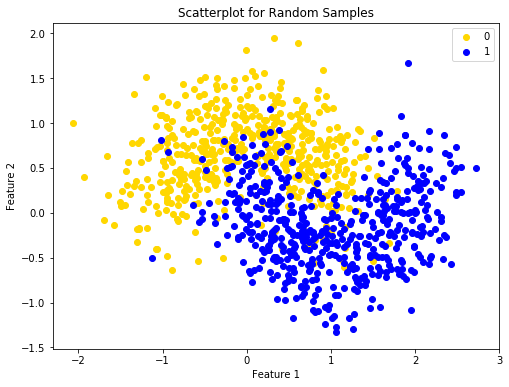

In [213]:
cdict = {0: 'gold', 1: 'blue'}

#Add labels for colors of scatter
fig, ax = plt.subplots(figsize=(8,6))
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], c = cdict[g], label = g)
ax.legend()

plt.title('Scatterplot for Random Samples')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

**(c), (d)**

In [214]:
#Create 3 different data subsets by selecting 100 of the 1000 data points at random three times
np.random.seed(321)
idx1 = np.random.randint(1000, size=100)
subset1 = synthetic_data[idx1,:]

np.random.seed(123)
idx2 = np.random.randint(1000, size=100)
subset2 = synthetic_data[idx2,:]

np.random.seed(222)
idx3 = np.random.randint(1000, size=100)
subset3 = synthetic_data[idx3,:]

In [215]:
#For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: k={1,25,50}
kneighbors = [1, 25, 50]
datasets = [subset1, subset2, subset3]

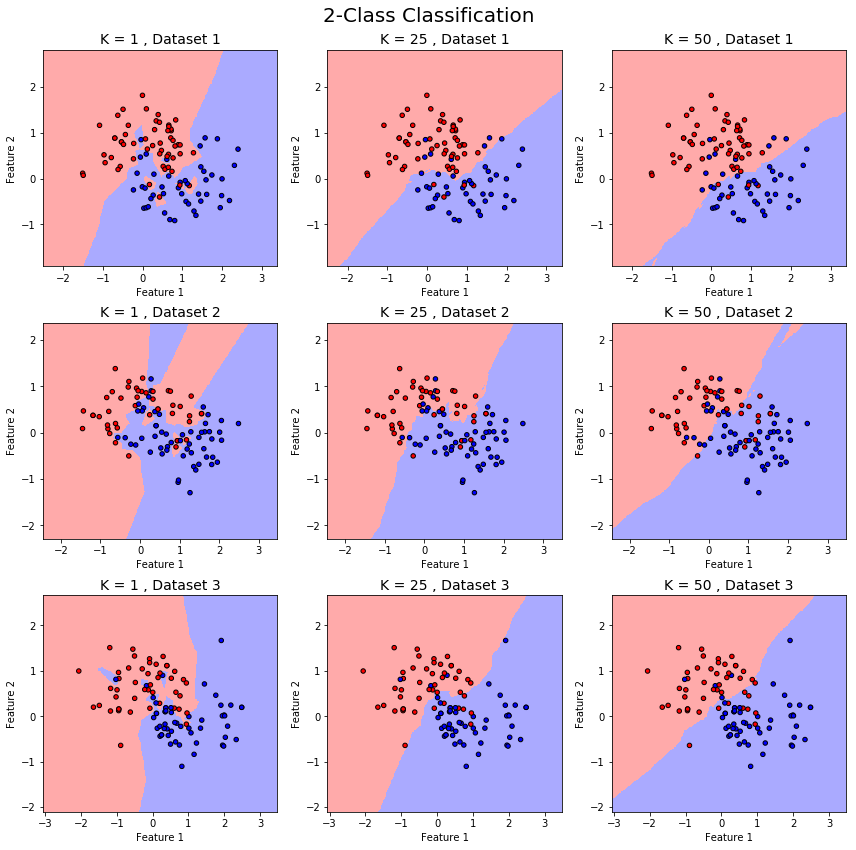

In [222]:
#Plot the decision boundary in 3-by-3 grid
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

fig, axes = plt.subplots(3, 3, figsize = (12,12))
i=0
for ds_cnt, ds in enumerate(datasets):
    for neighbor in kneighbors:
        i+=1
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors = neighbor)
        X = ds[:, 0:2]
        y = ds[:, 2]
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.subplot(int('33' + str(i) ))
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                    edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title("K = %i , Dataset %i"
                  % (neighbor, ds_cnt+1),  fontsize=14)
fig.suptitle("2-Class Classification", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.93)

plt.show()

**(e)**

Difference between rows and columns: For the same number of neighbor(s), $K=1$ has a pretty nonlinear (rugged) decision boundary and overfits the individual data point. As $K$ increases, the decision boundary becomes smoother and smoother and is almost linear at $K=50$. For those subsets sampled from the same training dataset, $K=1$ shows very different decision boundary but as $K$ increases, their decision boundary becomes more and more similar (almost the same when $K=50$).

$K=25$ seems to best separate the boundary and $K=1$ vary the most as data changes.

**(f)**

When $K$ is small, variance is high and bias is low since the model is very complicated and seems to overfit the data. As $K$ increases, variance becomes smaller and bias becomes higher, which seems to simplify the question.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

**(a)**

In [223]:
#create a new test set of 1000 random samples
(X_test,y_test) =  make_moons(n_samples=1000, noise=0.35,  random_state= 321)

In [224]:
X_train = X_train
y_train = y_train

In [225]:
y_train.shape

(1000,)

**(b)**

In [226]:
#Train a kNN classifier on your training set for  k=1,2,...500
error = []
for k in range(1, 501):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error.append(1 - metrics.accuracy_score(y_pred, y_test))

Text(0,0.5,'Error Rate')

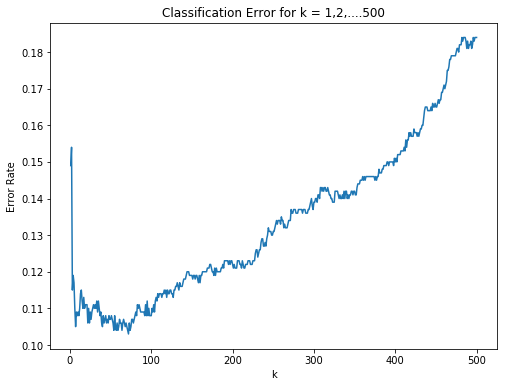

In [228]:
plt.figure(figsize=(8,6))
x_axis = np.arange(1, 501)
error = np.array(error)
plt.plot(x_axis, error)
plt.title('Classification Error for k = 1,2,....500')
plt.xlabel('k')
plt.ylabel('Error Rate')

**(c)**

When $K = 1$, the decision boundary is overly flexible and error rate is large. As $K$ grows from 1 to 71, the method becomes less overfitting, bias increase and classification error drops. However, as $K$ grows from 71 to 500, the method becomes less flexible (generalize too much) and produces a decision boundary that is close to linear. Therefore, error rate increases significantly.

**(d)**

$K = 1$ represents high variance and $K$ from 100 onwards represetns high bias.

**(e)**

In [139]:
#minimum error
sorted(error)[:1][0]

0.10299999999999998

In [140]:
#optimal value of k
k_min = np.argmin(error)
k_min

71

The optimal value of $K$ is 71 since it gives the smallest error rate.

**(f)** 

Model parameters (hyperparameter) controls the flexibility of models.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

**(a)**

In [229]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

Text(0,0.5,'training y')

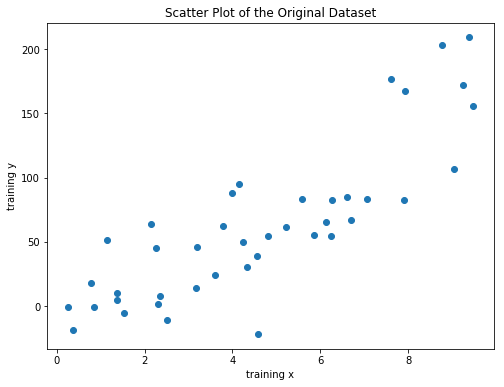

In [230]:
#Create a scatter plot of training data
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train)
plt.title("Scatter Plot of the Original Dataset")
plt.xlabel('training x')
plt.ylabel('training y')

**(b)** 

In [231]:
#Estimate a linear regression model for the training data
from sklearn.linear_model import LinearRegression

X = np.array(x_train).reshape(-1, 1)
y = y_train
reg = LinearRegression().fit(X, y)
reg.score(X, y)  #coefficient of determination R^2

0.7014590913812251

In [232]:
y_pred = reg.predict(X) #use the emodel to fit X and get prediction y_pred

In [233]:
metrics.mean_squared_error(y, y_pred) #mean square error

1052.5853662498014

In [234]:
reg.coef_  #coefficient

array([18.30320685])

In [235]:
reg.intercept_  #intercept

-21.73078292905422

$R^2$ value is $0.70$ and mean square error is $1052.59$. The equation representing the estimated model is $y = 18.3x-21.7$. 

**(c)**

From looking at the scatter plot, we can see there seems to be a curve tendency instead of linear property. So I choose to square the predictor.

In [236]:
#Square the predictor variable and retrain knn
square_x = np.square(X)
X_square = np.c_[X, square_x]
squarereg = LinearRegression().fit(X_square, y)
squarereg.score(X_square, y) #coefficient of determination R^2

0.7490480719353505

In [237]:
y_pred_square = squarereg.predict(X_square)

In [238]:
metrics.mean_squared_error(y, y_pred_square) #mean square error

884.797759660905

In [239]:
squarereg.coef_  #coefficient

array([0.47100686, 1.83208191])

In [240]:
squarereg.intercept_  #intercept

8.007337461589657

$R^2$ value is $0.749$ and mean square error is $884.80$. The equation representing the estimated model is $y = 0.47x+1.83 x^2+8$. 

**(d)**

In [241]:
#create simulated data for transformation case
x_simu = np.linspace(0, 10, 100)
f = lambda x: 8 + 0.47*x + 1.83*(x**2)
y_simu_square = f(x_simu)

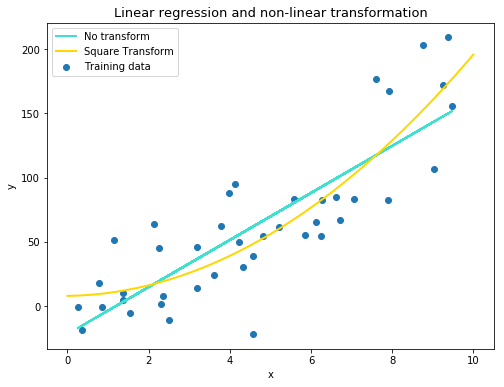

In [242]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, label = 'Training data')
plt.plot(x_train, y_pred, color='turquoise', linewidth=2, label = 'No transform')
plt.plot(x_simu, y_simu_square, color='gold', linewidth=2, label = 'Square Transform')
plt.axis('tight')
plt.legend(loc='upper left')
plt.title("Linear regression and non-linear transformation", fontsize=13)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**(e)**

In [243]:
#Linear Regression with no transformation
X_test = np.array(x_test).reshape(-1, 1)
y_test_pred = reg.predict(X_test)

In [244]:
reg.score(X_test, y_test) #R^2

0.5556465885794163

In [245]:
metrics.mean_squared_error(y_test, y_test_pred) #mean squared error

2023.3121088887128

For plain villna model, $R^2$ value is $0.56$ and mean square error is $2023.31$. 

In [246]:
#Linear model with square transformation
square_x_test = np.square(X_test)
X_square_test = np.c_[X_test, square_x_test]
y_test_pred_square = squarereg.predict(X_square_test)

In [247]:
squarereg.score(X_square_test, y_test) #R^2

0.6927820089560344

In [248]:
metrics.mean_squared_error(y_test, y_test_pred_square) #mean squared error

1398.8817580143948

For linear model with square transformation of predictor variable, $R^2$ value is $0.69$ and mean square error is $1398.89$. 

**(f)**

Linear model with square transform of predictor variable performs better in both training and test cases with $R^2$ 0.749 in training dataset and 0.69 in test dataset. The reason is that a more flexible method catches the square tendency underlying the relationship between predictor and response.

**(g)**

If the test dataset is significantly different from training dataset, then we might need to train a completely different model on a similar dataset in order to have a reasonable predictability. Otherwise, the predictive capability of the current model will be very poor. For instance, if all test data points are out of range for the min and max boundary of current training dataset, then using model for this particular training will have very poor predictability for the test data.